In [44]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import fnmatch
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 12]  # add more space to figures

#### Events Dataset Descriptive Analysis and Preprocessing

In [72]:
events = pd.read_csv('data/geocoded_events.csv')
events.head()

,Name of Event,Category,Date(s),Location,Estimated Size of Event,Number of People/ Capacity of Space,Source for # People,Source Org Title,Article Title,Mention of Police Presence (Y/N),...,Source 2 URL,Address,Venue Capacity,Venue Type,Completed,Main Source for Search,Notes_y,Source,Latitude,Longitude
0,LANY,Music,2018-08-01 00:00:00,Bottom Lounge,Small,330,https://bottomlounge.com/bottom-lounge-for-pri...,Concert Archives,Chicago's Concert History,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Grace Weber / Malcolm London - Lollapalooza Af...,Music,2018-08-01 00:00:00,Lincoln Hall,Medium,500,https://chicagomusic.fandom.com/wiki/Lincoln_Hall,Concert Archives,Chicago's Concert History,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chase Atlantic,Music,2018-08-01 00:00:00,Reggies,Small,300,https://www.songkick.com/concerts/39931428-dri...,Concert Archives,Chicago's Concert History,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alison Wonderland,Music,2018-08-24 00:00:00,Aragon Ballroom,NaN,4800,https://www.bizbash.com/venues-destinations/un...,NaN,NaN,NaN,...,https://www.jambase.com/show/alison-wonderland...,"1106 W Lawrence Ave, Chicago, IL 60640",4800.0,Event Space,Yes,"Concert Archives, do312","this list is likely not comprehensive, but inc...",https://www.bizbash.com/venues-destinations/un...,41.969436,-87.658038
4,"Virtual Self ""Utopia System""",Music,2018-09-07 00:00:00,Aragon Ballroom,NaN,4800,https://www.bizbash.com/venues-destinations/un...,NaN,NaN,NaN,...,https://www.chicago-theater.com/theaters/arago...,"1106 W Lawrence Ave, Chicago, IL 60640",4800.0,Event Space,Yes,"Concert Archives, do312","this list is likely not comprehensive, but inc...",https://www.bizbash.com/venues-destinations/un...,41.969436,-87.658038


In [26]:
events.columns

Index(['Name of Event', 'Category', 'Date(s)', 'Location',
       'Estimated Size of Event', 'Number of People/ Capacity of Space',
       'Source for # People', 'Source Org Title', 'Article Title',
       'Mention of Police Presence (Y/N)', 'Source for police presence',
       'Official Media Presence', 'Notes_x', 'Source 1 URL', 'Source 2 URL',
       'Address', 'Venue Capacity', 'Venue Type', 'Completed',
       'Main Source for Search', 'Notes_y', 'Source', 'Latitude', 'Longitude'],
      dtype='object')

In [27]:
events.Category.value_counts(dropna=False)

Music                      897
Sports                     275
Event                       36
Film Screening              21
Festival                    19
Dance                       15
Screening                   14
Convention                   8
Comedy                       8
Fundraiser                   7
Farmer's Market              6
Theater                      5
Event/Festival               5
Events                       3
Book Reading                 2
Festival, Music              2
Music, Festival              2
Play                         2
Music, Event                 2
Food Festival                1
Concert/Event                1
Music, Theater, Dance        1
Art                          1
Music, Fundraiser            1
Political Event              1
Music, Art                   1
Event, Fundraiser            1
Event, Art Installation      1
Music, Film Screening        1
Conference                   1
Event,  Fundraiser           1
Film                         1
Comedy, 

In [28]:
events["Estimated Size of Event"].value_counts(dropna=False)

Medium    679
Large     492
NaN       149
Small      25
Name: Estimated Size of Event, dtype: int64

In [14]:
pd.to_numeric(events["Number of People/ Capacity of Space"])

ValueError: Unable to parse string "105000 per day" at position 23

In [15]:
events.iloc[23]

Name of Event                                                          Lollapalooza 2018
Category                                                                           Music
Date(s)                                                                8/2/2018-8/5/2018
Location                                                                      Grant Park
Estimated Size of Event                                                            Large
Number of People/ Capacity of Space                                       105000 per day
Source for # People                    https://chicago.suntimes.com/2018/8/6/18444782...
Source Org Title                                                        Concert Archives
Article Title                                                  Chicago's Concert History
Mention of Police Presence (Y/N)                                                       Y
Source for police presence             https://chicago.suntimes.com/2018/8/6/18444782...
Official Media Presen

So we need to handle date ranges.

In [29]:
events["Address"].value_counts(dropna=False)

1901 W Madison St, Chicago, IL 60612                                       141
2051 N Milwaukee Ave, Chicago, IL 60647                                    138
1807 S Allport St, Chicago, IL 60608                                        93
329 N Dearborn St, Chicago, IL 60654                                        80
220 S Michigan Ave, Chicago, IL 60604                                       79
3730 N Clark St, Chicago, IL 60613                                          76
1106 W Lawrence Ave, Chicago, IL 60640                                      71
201 E Randolph St, Chicago, IL 60601                                        69
3635 N Clark St, Chicago, IL 60613                                          66
4746 N Racine Ave, Chicago, IL 60640                                        61
NaN                                                                         54
1060 W Addison St, Chicago, IL 60613                                        53
525 S Racine Ave, Chicago, IL 60607                 

In [30]:
events.Completed.value_counts(dropna=False)

Yes                                                                 1086
Completed Concert Archives, need check for other events on do312     168
NaN                                                                   56
Yes                                                                   22
Return                                                                 8
Yes*                                                                   3
Completed except for do312                                             2
Name: Completed, dtype: int64

In [32]:
events.Completed.value_counts(dropna=False).index

Index([                                                             'Yes',
       'Completed Concert Archives, need check for other events on do312',
                                                                      nan,
                                                                   'Yes ',
                                                                 'Return',
                                                                   'Yes*',
                                             'Completed except for do312'],
      dtype='object')

In [73]:
# replace Yes with space with Yes
events.Completed = events.Completed.replace(to_replace=['Yes ','Yes*'], value="Yes")
events.Completed.value_counts(dropna=False)

Yes                                                                 1111
Completed Concert Archives, need check for other events on do312     168
NaN                                                                   56
Return                                                                 8
Completed except for do312                                             2
Name: Completed, dtype: int64

This is good news - most of the events were at completed venues (ie venues where all known events were logged in the time period of interest). This is important because we _cannot_ use uncompleted venues in our planned analysis, because this means that there might be unknown events occurring in the time periods that we use as control.

In [74]:
# discard uncompleted venues
full_data_events = events[(events.Completed == 'Yes')]

full_data_events.columns

Index(['Name of Event', 'Category', 'Date(s)', 'Location',
       'Estimated Size of Event', 'Number of People/ Capacity of Space',
       'Source for # People', 'Source Org Title', 'Article Title',
       'Mention of Police Presence (Y/N)', 'Source for police presence',
       'Official Media Presence', 'Notes_x', 'Source 1 URL', 'Source 2 URL',
       'Address', 'Venue Capacity', 'Venue Type', 'Completed',
       'Main Source for Search', 'Notes_y', 'Source', 'Latitude', 'Longitude'],
      dtype='object')

In [75]:
full_data_events['Mention of Police Presence (Y/N)'].value_counts(dropna=False)

NaN    1110
Y         1
Name: Mention of Police Presence (Y/N), dtype: int64

In [37]:
full_data_events['Official Media Presence'].value_counts(dropna=False)

NaN    1110
Y         1
Name: Official Media Presence, dtype: int64

In [76]:
full_data_events = full_data_events.drop(columns=[
        'Source for # People', 'Source Org Title', 'Article Title','Mention of Police Presence (Y/N)', 
        'Source for police presence', 'Official Media Presence', 'Notes_x', 'Source 1 URL', 'Source 2 URL',
        'Completed','Main Source for Search', 'Notes_y', 'Source'
    ]
    ).rename(columns={'Number of People/ Capacity of Space':"Number People"})
full_data_events

,Name of Event,Category,Date(s),Location,Estimated Size of Event,Number People,Address,Venue Capacity,Venue Type,Latitude,Longitude
3,Alison Wonderland,Music,2018-08-24 00:00:00,Aragon Ballroom,NaN,4800,"1106 W Lawrence Ave, Chicago, IL 60640",4800.0,Event Space,41.969436,-87.658038
4,"Virtual Self ""Utopia System""",Music,2018-09-07 00:00:00,Aragon Ballroom,NaN,4800,"1106 W Lawrence Ave, Chicago, IL 60640",4800.0,Event Space,41.969436,-87.658038
6,5 Seconds of Summer / The Aces,Music,2018-09-08 00:00:00,Aragon Ballroom,NaN,4800,"1106 W Lawrence Ave, Chicago, IL 60640",4800.0,Event Space,41.969436,-87.658038
9,SIGRID W/ HOUSES,Music,2019-08-01 00:00:00,Thalia Hall,Medium,800,"1807 S Allport St, Chicago, IL 60608",800.0,Music,41.857681,-87.657392
10,JUDAH & THE LION W/ THE BAND CAMINO,Music,2019-08-02 00:00:00,Thalia Hall,Medium,800,"1807 S Allport St, Chicago, IL 60608",800.0,Music,41.857681,-87.657392
...,...,...,...,...,...,...,...,...,...,...,...
1340,Chicago Cubs vs Pittsburgh Pirates,Sports,7/12/2019 - 7/24/2019,Wrigley Field,Large,41160,"1060 W Addison St, Chicago, IL 60613",41160.0,Sports,41.947588,-87.656125
1341,Chicago Cubs vs Cincinnati,Sports,7/15/2019 - 7/17/2019,Wrigley Field,Large,41160,"1060 W Addison St, Chicago, IL 60613",41160.0,Sports,41.947588,-87.656125
1342,Chicago Cubs vs San Diego Padres,Sports,7/19/2019 - 7/21/2019,Wrigley Field,Large,41160,"1060 W Addison St, Chicago, IL 60613",41160.0,Sports,41.947588,-87.656125
1343,14TH ANNUAL RACE TO WRIGLEY 5K CHARITY RUN PRE...,Sports,2019-04-27 00:00:00,Wrigley Field,Large,41160,"1060 W Addison St, Chicago, IL 60613",41160.0,Sports,41.947588,-87.656125


In [77]:
# now drop multi-day events (for now)
single_day_events = full_data_events[full_data_events["Date(s)"].str.contains('\d\d\d\d-\d\d-\d\d \d\d:\d\d:\d\d')]
single_day_events

,Name of Event,Category,Date(s),Location,Estimated Size of Event,Number People,Address,Venue Capacity,Venue Type,Latitude,Longitude
3,Alison Wonderland,Music,2018-08-24 00:00:00,Aragon Ballroom,NaN,4800,"1106 W Lawrence Ave, Chicago, IL 60640",4800.0,Event Space,41.969436,-87.658038
4,"Virtual Self ""Utopia System""",Music,2018-09-07 00:00:00,Aragon Ballroom,NaN,4800,"1106 W Lawrence Ave, Chicago, IL 60640",4800.0,Event Space,41.969436,-87.658038
6,5 Seconds of Summer / The Aces,Music,2018-09-08 00:00:00,Aragon Ballroom,NaN,4800,"1106 W Lawrence Ave, Chicago, IL 60640",4800.0,Event Space,41.969436,-87.658038
9,SIGRID W/ HOUSES,Music,2019-08-01 00:00:00,Thalia Hall,Medium,800,"1807 S Allport St, Chicago, IL 60608",800.0,Music,41.857681,-87.657392
10,JUDAH & THE LION W/ THE BAND CAMINO,Music,2019-08-02 00:00:00,Thalia Hall,Medium,800,"1807 S Allport St, Chicago, IL 60608",800.0,Music,41.857681,-87.657392
...,...,...,...,...,...,...,...,...,...,...,...
1321,Chicago Cubs vs Los Angeles Dodgers,Sports,2019-03-20 00:00:00,Wrigley Field,Large,41160,"1060 W Addison St, Chicago, IL 60613",41160.0,Sports,41.947588,-87.656125
1322,Chicago Cubs vs San Francisco Giants,Sports,2019-03-21 00:00:00,Wrigley Field,Large,41160,"1060 W Addison St, Chicago, IL 60613",41160.0,Sports,41.947588,-87.656125
1334,Chicago Cubs vs Los Angeles Angels,Sports,2019-06-03 00:00:00,Wrigley Field,Large,41160,"1060 W Addison St, Chicago, IL 60613",41160.0,Sports,41.947588,-87.656125
1343,14TH ANNUAL RACE TO WRIGLEY 5K CHARITY RUN PRE...,Sports,2019-04-27 00:00:00,Wrigley Field,Large,41160,"1060 W Addison St, Chicago, IL 60613",41160.0,Sports,41.947588,-87.656125


In [78]:
# which venues had multi-day events?
multi_day_events = full_data_events[full_data_events["Date(s)"].str.contains('\d\d\d\d-\d\d-\d\d \d\d:\d\d:\d\d') == False]
multi_day_events

,Name of Event,Category,Date(s),Location,Estimated Size of Event,Number People,Address,Venue Capacity,Venue Type,Latitude,Longitude
23,Lollapalooza 2018,Music,8/2/2018-8/5/2018,Grant Park,Large,105000 per day,"331 E. Randolph St. Chicago, IL 60601",100000.0,"Music, Events",41.872182,-87.618746
47,Zeds Dead / Barely Alive,Music,10/19/2018 - 10/20/2018,Aragon Ballroom,NaN,4800,"1106 W Lawrence Ave, Chicago, IL 60640",4800.0,Event Space,41.969436,-87.658038
50,Cold and Black and Infinite North America 2018,Music,10/25/2018 - 10/27/2018,Aragon Ballroom,NaN,4800,"1106 W Lawrence Ave, Chicago, IL 60640",4800.0,Event Space,41.969436,-87.658038
51,NINE INCH NAILS W/ THE JESUS AND MARY CHAIN,Music,10/26/2018 - 10/27/2018,Aragon Ballroom,NaN,4800,"1106 W Lawrence Ave, Chicago, IL 60640",4800.0,Event Space,41.969436,-87.658038
80,"The Nights We Stole Christmas - Walk the Moon,...",Music,12/1/2018 - 12/2/2018,Aragon Ballroom,NaN,4800,"1106 W Lawrence Ave, Chicago, IL 60640",4800.0,Event Space,41.969436,-87.658038
...,...,...,...,...,...,...,...,...,...,...,...
1338,Chicago Cubs vs NewYork Mets,Sports,6/20/2019 - 6/23/2019,Wrigley Field,Large,41160,"1060 W Addison St, Chicago, IL 60613",41160.0,Sports,41.947588,-87.656125
1339,Chicago Cubs vs Atlanta,Sports,6/24/2019 - 6/27/2019,Wrigley Field,Large,41160,"1060 W Addison St, Chicago, IL 60613",41160.0,Sports,41.947588,-87.656125
1340,Chicago Cubs vs Pittsburgh Pirates,Sports,7/12/2019 - 7/24/2019,Wrigley Field,Large,41160,"1060 W Addison St, Chicago, IL 60613",41160.0,Sports,41.947588,-87.656125
1341,Chicago Cubs vs Cincinnati,Sports,7/15/2019 - 7/17/2019,Wrigley Field,Large,41160,"1060 W Addison St, Chicago, IL 60613",41160.0,Sports,41.947588,-87.656125


In [59]:
multi_day_events["Location"].value_counts(dropna=False)

Guaranteed Rate Field             30
Wrigley Field                     29
Chicago Symphony Orchestra        23
Auditorium Theatre                13
Civic Opera House                 11
United Center                      9
Thalia Hall                        9
Concord Music Hall                 8
Millennium Park                    8
The Chicago Theatre                8
Aragon Ballroom                    7
Soldier Field                      5
Lincoln Park Zoo                   4
Riviera Theatre                    4
Gallagher Way                      3
Main Hall in UIC Dorin Forum       3
Museum of Science and Industry     3
Arie Crown Theater                 3
Grant Park                         3
Credit Union 1 Arena               2
Huntington Bank Pavilion           1
Name: Location, dtype: int64

In [60]:
single_day_events["Location"].value_counts(dropna=False)

United Center                     132
Concord Music Hall                130
Thalia Hall                        84
Aragon Ballroom                    64
Gallagher Way                      63
Millennium Park                    61
Riviera Theatre                    57
Chicago Symphony Orchestra         56
Credit Union 1 Arena               45
The Chicago Theatre                31
Civic Opera House                  30
Soldier Field                      30
Wrigley Field                      24
Auditorium Theatre                 23
Huntington Bank Pavilion           21
Lincoln Park Zoo                   16
Guaranteed Rate Field              15
Museum of Science and Industry     12
Grant Park                          9
Arie Crown Theater                  7
Petrillo Music Shell                5
Field Museum                        5
Sheraton Grand Chicago              2
Main Hall in UIC Dorin Forum        1
Cinespace Chicago Film Studios      1
Union Station                       1
Name: Locati

Unfortunately, there's a lot of overlap. So we will have to conver the multiday events into single-day events. Or else we will face the same control-group noncompliance issue that we mentioned previously.

In [61]:
full_data_events["Category"].value_counts(dropna=False)

Music                      688
Sports                     258
Event                       36
Film Screening              21
Festival                    18
Dance                       15
Screening                   14
Comedy                       8
Fundraiser                   7
Farmer's Market              6
Event/Festival               5
Theater                      5
Events                       3
Music, Event                 2
Book Reading                 2
Festival, Music              2
Play                         2
Music, Festival              2
Event,  Fundraiser           1
Music, Fundraiser            1
Convention                   1
Concert/Event                1
Music, Theater, Dance        1
Art                          1
Event, Fundraiser            1
Food Festival                1
Music, Art                   1
Political Event              1
Event, Art Installation      1
Music, Film Screening        1
Conference                   1
Film                         1
Comedy, 

In [79]:
full_data_geo = gpd.GeoDataFrame(full_data_events, geometry = gpd.points_from_xy(full_data_events['Longitude'], full_data_events['Latitude']))

In [80]:
police_beats = gpd.read_file('geo/police_beats.shp')
police_beats

,beat,beat_num,district,sector,geometry
0,1,1713,17,1,"POLYGON ((-87.70473 41.97577, -87.70472 41.975..."
1,0,3100,31,0,"POLYGON ((-87.83365 41.97535, -87.83366 41.974..."
2,5,1651,16,5,"POLYGON ((-87.90684 41.97656, -87.91070 41.975..."
3,1,1914,19,1,"POLYGON ((-87.64492 41.96973, -87.64431 41.969..."
4,1,1915,19,1,"POLYGON ((-87.63724 41.96599, -87.63644 41.965..."
...,...,...,...,...,...
272,1,0314,03,1,"POLYGON ((-87.58879 41.78612, -87.58844 41.786..."
273,2,0825,08,2,"POLYGON ((-87.67917 41.78656, -87.67912 41.784..."
274,1,0313,03,1,"POLYGON ((-87.60854 41.78583, -87.60808 41.785..."
275,2,0823,08,2,"POLYGON ((-87.69354 41.78458, -87.69354 41.784..."


<AxesSubplot:>

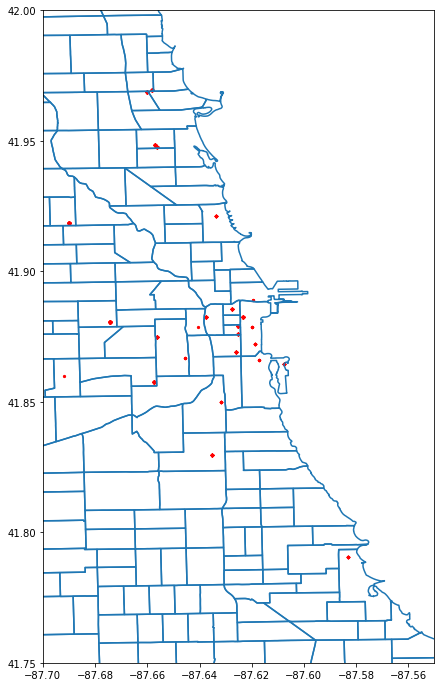

In [87]:
fig,ax = plt.subplots()
ax.set_xlim((-87.7,-87.55))
ax.set_ylim((41.75,42.0))
police_beats.boundary.plot(ax=ax)
full_data_geo.plot(ax=ax,color='red',markersize=5)